In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time

# Import your custom classes from their respective files
from PriceLoader import PriceLoader
from backtester import Backtester
from strategies.base_strategy import Strategy
from strategies.BenchmarkStrategy import BenchmarkStrategy
from strategies.ma_strategy import MovingAverageStrategy
from strategies.MACDStrategy import MACDStrategy
from strategies.RSIStrategy import RSIStrategy
from strategies.VolatilityBreakoutStrategy import VolatilityBreakoutStrategy



In [2]:
price_loader = PriceLoader()
backtester = Backtester(initial_cash=1_000_000)

strategies = {
    "Benchmark (Buy and Hold)": BenchmarkStrategy(),
    "Moving Average (20/50)": MovingAverageStrategy(),
    "Volatility Breakout (20)": VolatilityBreakoutStrategy(),
    "MACD (12/26/9)": MACDStrategy(),
    "RSI (14)": RSIStrategy()
}

c:\Users\sverr\Documents\python_projects\Assignment_2\PriceLoader.py:27: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(response.text)


In [3]:
print("Loading S&P 500 price data...")
price_data = price_loader.get_prices()
print("Data loaded successfully.")
price_data.info()
price_data.head()

Loading S&P 500 price data...
Data loaded successfully.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2005-01-03 to 2024-12-31
Columns: 503 entries, MMM to ZTS
dtypes: float64(503)
memory usage: 19.4 MB


Ticker,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WMB,WTW,WDAY,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,37.621841,3.474455,13.884208,NaN,18.431829,30.838949,21.410000,8.861713,12.382108,14.299249,...,5.299078,69.091019,NaN,35.232498,8.347402,NaN,11.466340,55.509998,68.591949,NaN
2005-01-04,37.315941,3.396245,13.744381,NaN,17.998470,30.024111,20.209999,8.534716,12.369635,13.922009,...,5.254723,69.575317,NaN,35.157238,8.222325,NaN,11.314498,54.470001,68.566032,NaN
2005-01-05,36.859352,3.284855,13.586714,NaN,17.928572,29.859142,19.750000,8.515096,12.279210,13.916024,...,5.217188,68.473061,NaN,35.554996,8.129681,NaN,11.287560,52.570000,68.030258,NaN
2005-01-06,37.192657,3.328701,13.893133,NaN,17.767803,29.364239,19.719999,8.521633,12.469410,13.610636,...,5.288841,68.189163,NaN,36.995480,8.115788,NaN,11.414910,52.650002,68.816582,NaN
2005-01-07,37.576172,3.318035,14.131131,NaN,18.599577,29.384233,19.920000,8.397378,12.375865,13.598657,...,5.230835,67.320724,NaN,35.764606,8.069463,NaN,11.351234,53.099998,68.695641,NaN


In [4]:
all_results = {}
for name, strategy in strategies.items():
    print(f"--- Running backtest for: {name} ---")
    start_time = time.time()
    results = backtester.run(strategy, price_data)
    end_time = time.time()
    all_results[name] = results
    print(f"Backtest completed in {end_time - start_time:.2f} seconds.\n")

--- Running backtest for: Benchmark (Buy and Hold) ---
Backtest completed in 2.60 seconds.

--- Running backtest for: Moving Average (20/50) ---
Backtest completed in 4.87 seconds.

--- Running backtest for: Volatility Breakout (20) ---
Backtest completed in 5.05 seconds.

--- Running backtest for: MACD (12/26/9) ---


c:\Users\sverr\Documents\python_projects\Assignment_2\strategies\MACDStrategy.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  buy_signals = crossover_events.shift(1).fillna(False).astype(bool)


Backtest completed in 3.48 seconds.

--- Running backtest for: RSI (14) ---
Backtest completed in 4.59 seconds.



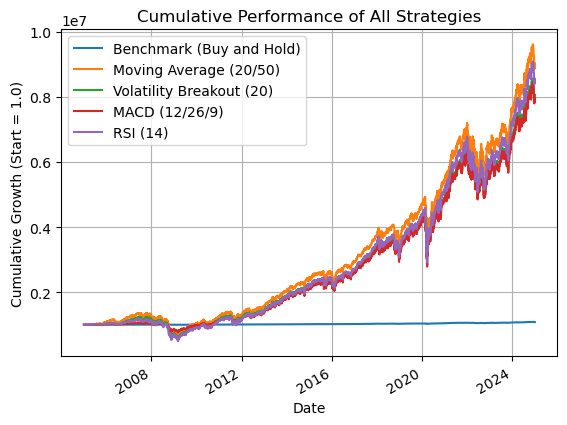

In [ ]:
# --- 1. Create a new DataFrame to hold the total value of each strategy ---
performance_df = pd.DataFrame()
for name, results_df in all_results.items():
    performance_df[name] = results_df['total_value']

performance_df.plot(grid=True, title="Cumulative Performance of All Strategies")
plt.ylabel("Cumulative Growth (Start = 1.0)")
plt.show()